In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas as gpd


In [35]:
# map_df = gpd.read_file('data/geo-data/countries.shp')
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_codes_df = pd.read_csv('data/geo-data/country_codes_a2_a3.csv')
country_codes_df.rename(index=str, columns={'Alpha-3 code': 'iso_a3', 'Alpha-2 code': 'iso_a2'}, inplace=True)


world_df = world_df.merge(country_codes_df)
world_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pop_est              182 non-null    int64   
 1   continent            182 non-null    object  
 2   name                 182 non-null    object  
 3   iso_a3               182 non-null    object  
 4   gdp_md_est           182 non-null    float64 
 5   geometry             182 non-null    geometry
 6   Country              182 non-null    object  
 7   iso_a2               181 non-null    object  
 8   Numeric code         182 non-null    int64   
 9   Latitude (average)   182 non-null    float64 
 10  Longitude (average)  182 non-null    float64 
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 17.1+ KB


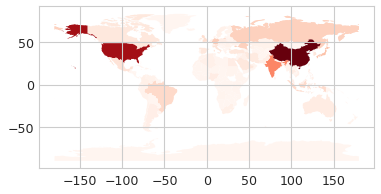

In [41]:
world_df.plot(column='gdp_md_est', cmap='Reds')

In [52]:
birthplace_df = pd.read_csv('data/artist_birthplace.csv')
birthplace_counts_df = pd.Series(birthplace_df['birth_country'].nunique())

world_df = world_df.merge(birthplace_counts_df)
world_df.plot(column='artist_count', cmap='Reds')

ValueError: Cannot merge a Series without a name